In [45]:
import sys

import boto3
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

In [46]:
client = boto3.client('iotanalytics')
nrows_read = None # specify 'None' if want to read whole data set (10k records)
dataset = 'trip_dataset'
data_location = client.get_dataset_content(datasetName=dataset)['entries'][0]['dataURI']

In [47]:
df = pd.read_csv(data_location)

In [48]:
#df.timestamp = pd.to_datetime(pd.to_numeric(df.timestamp), unit='ms')
df.reset_index(inplace=True, drop=True)

In [49]:
df.set_index(df.timestamp, inplace=True)
df.sort_index()

,vehicle_speed_mean,engine_speed_mean,torque_at_transmission_mean,oil_temp_mean,accelerator_pedal_position_mean,brake_mean,high_speed_duration,high_acceleration_event,high_braking_event,idle_duration,...,fuel_consumed_since_restart,latitude,longitude,timestamp,trip_id,vin,name,end_time,geojson,__dt
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-06 08:09:58.028000000,62.059250,3232.641019,131.458447,236.662803,20.405851,0.000000,0,0,0,674,...,0.605415,38.935166,-77.241035,2021-03-06 08:09:58.028000000,eb72588c-282f-4ae8-b053-2b30d749a2c0,GJZ6WI1AFD6LOXR5P,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000
2021-03-06 08:10:00.623000000,65.590296,3195.275349,201.482375,236.381469,27.382443,5.277778,0,8,2,69732,...,0.793999,38.861240,-77.298709,2021-03-06 08:10:00.623000000,be024382-c49d-41e7-a0f4-0460452c38db,6HBNW65RC9WTY5X0S,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000
2021-03-06 08:10:00.660000000,64.670563,3177.198826,194.129211,236.517798,27.667980,0.222222,0,0,0,720,...,0.801195,38.960842,-77.149940,2021-03-06 08:10:00.660000000,bee88b9a-33e4-4604-acfd-520d96357f30,QIUPMEJ02PMVOZG2N,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000
2021-03-06 08:10:02.501000000,52.052249,2922.878395,101.868619,236.509795,16.817311,0.777994,0,2,0,29734,...,0.508436,38.950718,-77.197338,2021-03-06 08:10:02.501000000,2b35d507-eb46-466f-9ced-ffbe60f616a6,TQBOBZ2BJFXR5OWFZ,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000
2021-03-06 08:10:04.927000000,61.281783,3037.401420,183.265232,236.689826,25.597347,4.694444,0,3,0,75323,...,0.745743,38.934159,-77.232819,2021-03-06 08:10:04.927000000,c6bacef5-1bfc-4a72-8261-6c1272772f13,5JO226H6QR3J3T7TI,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-06 10:07:25.029000000,57.865945,2997.146616,150.609428,239.556636,22.646711,1.563043,0,0,0,65761,...,1.064993,38.871441,-77.043691,2021-03-06 10:07:25.029000000,a95a2532-1e68-4b2e-a992-ae43bd12dd24,TQBOBZ2BJFXR5OWFZ,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000
2021-03-06 10:08:55.047000000,59.012230,3025.101046,160.777402,239.702816,23.705079,1.515662,0,0,0,65761,...,1.145656,38.881988,-77.028064,2021-03-06 10:08:55.047000000,a95a2532-1e68-4b2e-a992-ae43bd12dd24,TQBOBZ2BJFXR5OWFZ,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000
2021-03-06 10:10:25.060000000,59.739683,3037.121676,165.347608,239.848177,24.184825,1.471069,0,0,0,65761,...,1.202555,38.882258,-77.014966,2021-03-06 10:10:25.060000000,a95a2532-1e68-4b2e-a992-ae43bd12dd24,TQBOBZ2BJFXR5OWFZ,aggregated_telemetrics,NaN,NaN,2021-03-06 00:00:00.000


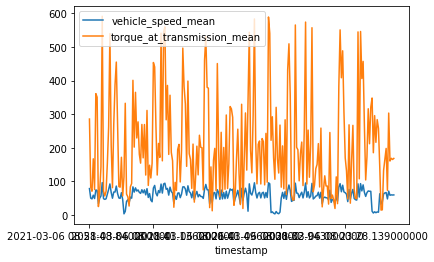

In [50]:
fig, ax = plt.subplots()
df.vehicle_speed_mean.plot(legend=True)
df.torque_at_transmission_mean.plot(legend=True)
plt.show()

In [51]:
print('Average speed: ', df.vehicle_speed_mean.mean())

Average speed:  59.314470666153476
